In [1]:
import os
import sys
import logging
import datetime
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sys.path.insert(1, r'methods')

from data_methods import getData, standardize
# from dimensionality_reduction import reduce_dimensionality,reduce_with
# from beamSearch import EMM, as_string
# from adjPysubgroup import adjustedBestFirstSearch, adjustedDFS, adjustedApriori
from qualityMeasures import calc_result_bs, calc_result_ps
from interpretabilityMeasures import Feature_Correlation_Scores, DBI_beam, DBI_ps

In [3]:
# Loading the object using dill
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\sd_results'
file_name = 'Ionosphere-data-reductions.pkl'
with open(os.path.join(sd_results_path,file_name), 'rb') as f:
    dfs_dict =pickle.load(f)

In [4]:
# datasets = []
# for dataset in dataset:
#     file_name = '-data-reductions.pkl'
#     en_methods = ['vanilla', 'auto_encoder', 'PCA', 'SPCA']
#     for en_method in en_methods:
#         fcs, fcss = Feature_Correlation_Scores(loaded_dict['vanilla'], loaded_dict[en_method])
#         print(en_method, "    ", "\n FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))

In [15]:
en_methods = ['auto_encoder', 'PCA', 'SPCA']
for en_method in en_methods:
    fcs, fcss = Feature_Correlation_Scores(dfs_dict['vanilla'], dfs_dict[en_method])
    print(en_method, "    ", "\n FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))

auto_encoder      
 FCS:  0.59     FCSS 0.12
PCA      
 FCS:  0.65     FCSS 0.14
SPCA      
 FCS:  0.72     FCSS 0.19


In [3]:
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
file_name = 'Soybean-results.pkl'
with open(os.path.join(sd_results_path,file_name), 'rb') as f:
    results_dict =pickle.load(f)

In [16]:
bfs = results_dict['vanilla']['Best-First Search']['results_org']
bfs_en = results_dict['PCA']['Best-First Search']['results_org']

In [17]:
vanilla = results_dict['auto_encoder']['Beam Search']['results_org']

In [18]:
subgroups_n = [i for i in vanilla.get_values()]

In [21]:
df = dfs_dict['auto_encoder']

In [22]:
df[df.eval(str(subgroups_n[1][1]).replace("', '", ' and ').replace("['", '').replace("']", ''))]

,target,cat1,cat2,cat3,cat4,cat5
36,0,2.670305,-0.637574,-0.008092,0.009340,1.814592
398,0,2.418383,-0.990442,-0.221028,0.080094,1.067282
513,0,3.184095,-1.293544,-0.379369,0.241604,2.213722
588,0,2.885142,-0.685566,-0.218985,0.358690,1.813227
632,0,-0.679030,-0.816299,-0.315998,0.162555,0.262455
...,...,...,...,...,...,...
8118,1,1.369584,-0.718166,1.165795,0.577131,-0.751188
8119,0,-0.775223,1.175854,-0.006725,2.146407,1.737964
8121,0,-1.062942,0.916443,0.504892,2.226397,2.688123
8122,1,1.088449,-0.264263,0.256847,1.536109,0.332227


In [47]:
str(subgroups_n[1][1])

"['cat2 > -0.8140837550163269', 'cat2 <= -0.17320257425308228']"

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
original_df = dfs_dict['vanilla']
features = [i for i in original_df.columns if i !='target']

In [6]:
OHenc = OneHotEncoder() 
dataCategorical = OHenc.fit_transform(original_df[features]).toarray()
original_encoded = pd.DataFrame(dataCategorical)

In [31]:
subgroups = results_dict['auto_encoder']['Best-First Search']['results_org']
subgroups
# subgroups[subgroups['relative_size_sg'] >= 0.5]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.060476,cat5<304.81,84,420,62,183,336,0.200000,0.800000,0.338798,0.661202,0.738095,0.360119,0.435714,1.693989
1,0.043810,cat4>=100.28,84,420,55,183,336,0.200000,0.800000,0.300546,0.699454,0.654762,0.380952,0.435714,1.502732
2,0.039048,cat2>=79.74,84,420,53,183,336,0.200000,0.800000,0.289617,0.710383,0.630952,0.386905,0.435714,1.448087
3,0.036667,cat1>=210.55,84,420,52,183,336,0.200000,0.800000,0.284153,0.715847,0.619048,0.389881,0.435714,1.420765
4,0.036037,cat2>=79.74 AND cat5<304.81,41,420,33,183,379,0.097619,0.902381,0.180328,0.819672,0.804878,0.395778,0.435714,1.847261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000561,cat4: [29.65:100.28[ AND cat5>=404.84,27,420,12,183,393,0.064286,0.935714,0.065574,0.934426,0.444444,0.435115,0.435714,1.020036
96,0.000493,cat1: [92.89:142.86[ AND cat4: [-41.07:-8.42[,11,420,5,183,409,0.026190,0.973810,0.027322,0.972678,0.454545,0.435208,0.435714,1.043219
97,0.000374,cat1: [92.89:142.86[ AND cat4>=100.28,18,420,8,183,402,0.042857,0.957143,0.043716,0.956284,0.444444,0.435323,0.435714,1.020036
98,0.000374,cat2<-21.22 AND cat4: [-41.07:-8.42[,18,420,8,183,402,0.042857,0.957143,0.043716,0.956284,0.444444,0.435323,0.435714,1.020036


In [23]:
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
dct_datasets = ['Arrhythmia'] # to test <- Remove later
categorical_datasets = ['Mushroom', 'Adult']
for dataset in dct_datasets:
    #Load dataframes and results
    df_file_name = dataset+'-data-reductions.pkl'
    results_file_name = dataset+'-results.pkl'
    with open(os.path.join(sd_results_path,df_file_name), 'rb') as f:
        dfs_dict =pickle.load(f)
    with open(os.path.join(sd_results_path,results_file_name), 'rb') as f:
        results_dict =pickle.load(f)
    #One-hot encode vanilla dataframe if categorical
    original_df = dfs_dict['vanilla']
    if dataset in categorical_datasets:
       features = [i for i in original_df.columns if i !='target']
       OHenc = OneHotEncoder() 
       dataCategorical = OHenc.fit_transform(original_df[features]).toarray()
       original_df = pd.DataFrame(dataCategorical)
    #Compute and print scores and index
    print(dataset, ":    \n")
    en_methods = ['auto_encoder', 'PCA', 'SPCA']
    ps_sd_methods = ['Apriori', 'Best-First Search', 'Depth-First Search']
    for en_method in en_methods:
        fcs, fcss = Feature_Correlation_Scores(original_df, dfs_dict[en_method])
        print(en_method, ":    ", "\n   FCS: ", round(fcs, 2), "    FCSS", round(fcss, 2))
        for sd_method in ps_sd_methods:
            dbi = DBI_ps(results_dict[en_method][sd_method]['results_org'], dfs_dict[en_method])
            print("DBI "+sd_method+": ", dbi)
        subgroups_beam = [i for i in results_dict[en_method]['Beam Search']['results_org'].get_values()]
        dbi = DBI_beam(subgroups_beam, dfs_dict[en_method])
        print("DBI Beam Search: ", dbi, "\n")
    print("\n\n")

Arrhythmia :    

auto_encoder :     
   FCS:  0.7     FCSS 0.31
DBI Apriori:  176.04204264686868
DBI Best-First Search:  185.5963747531536
DBI Depth-First Search:  184.90905777288822
DBI Beam Search:  1.2806238656859177e+18 

PCA :     
   FCS:  0.76     FCSS 0.25
DBI Apriori:  9.128979268086724
DBI Best-First Search:  8.782523375745633


UndefinedVariableError: name 'Dataset' is not defined

In [13]:
quality_results

[[[333, 0.9487179487179487, 58.82, 0.06939878734750526, 0.04347505296223243],
  [338,
   0.9629629629629629,
   14,
   0.039886039886039885,
   9,
   0.02564102564102564,
   26.13,
   0.04594930235955876,
   0.013787712762071731],
  [339,
   0.9658119658119658,
   13,
   0.037037037037037035,
   7,
   0.019943019943019943,
   24.13,
   0.060194316604573,
   0.014592738695302795],
  [344,
   0.98005698005698,
   17,
   0.04843304843304843,
   6,
   0.017094017094017096,
   24.75,
   0.05836803272700707,
   0.013204032434801657]]]

Depth-First Search :    


Ionosphere :    

coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 14 (0.039886039886039885)
# rows no longer in subgroups: 9, (0.02564102564102564)
average subgroup size auto encoded: 26.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


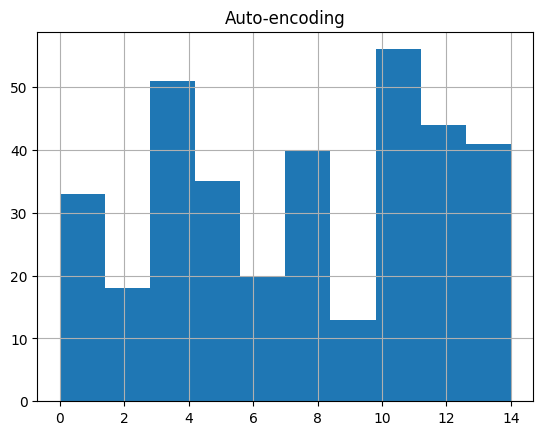

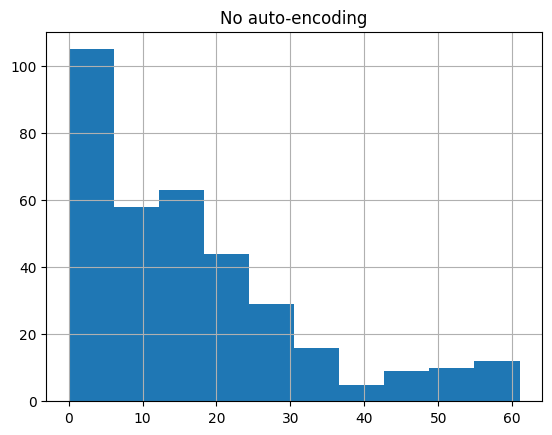

auto_encoder
coverage auto-encoding: 338, (0.9629629629629629)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 14 (0.039886039886039885)
# rows no longer in subgroups: 9, (0.02564102564102564)
average subgroup size auto encoded: 26.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.04594930235955876, Mean: 0.013787712762071731
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


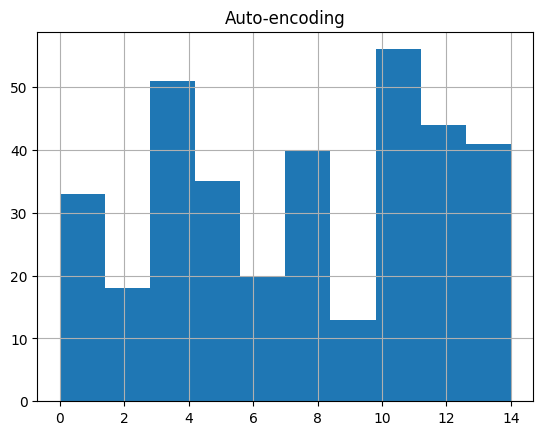

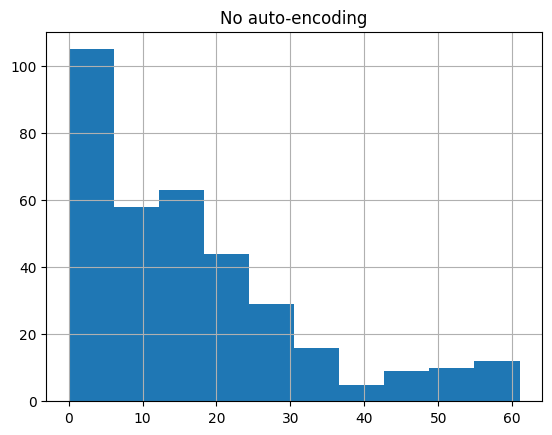

PCA
coverage auto-encoding: 339, (0.9658119658119658)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 13 (0.037037037037037035)
# rows no longer in subgroups: 7, (0.019943019943019943)
average subgroup size auto encoded: 24.13
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.060194316604573, Mean: 0.014592738695302795
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


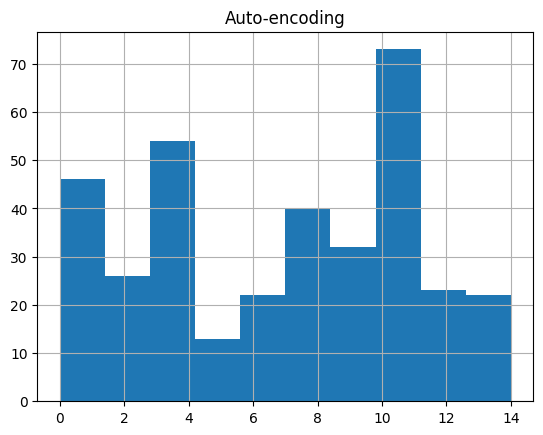

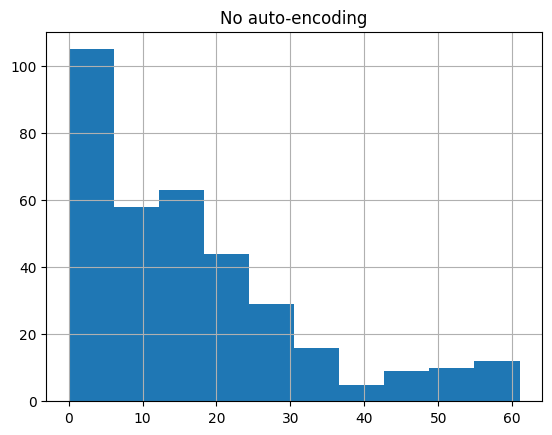

SPCA
coverage auto-encoding: 344, (0.98005698005698)
coverage no auto-encoding: 333, (0.9487179487179487)
# rows added in subgroups: 17 (0.04843304843304843)
# rows no longer in subgroups: 6, (0.017094017094017096)
average subgroup size auto encoded: 24.75
average subgroup size no auto encoding: 58.82
WRACC auto-encoding: Max: 0.05836803272700707, Mean: 0.013204032434801657
WRACC no auto-encoding: Max: 0.06939878734750526, Mean: 0.04347505296223243


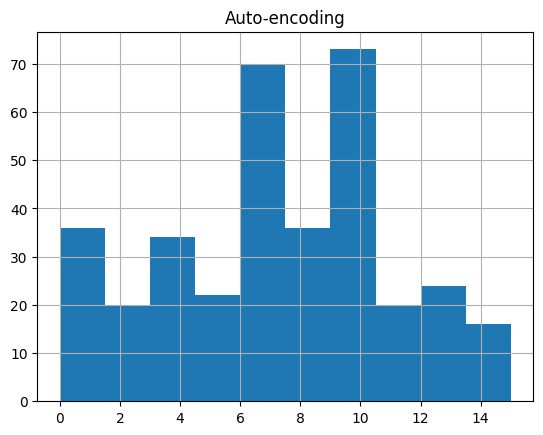

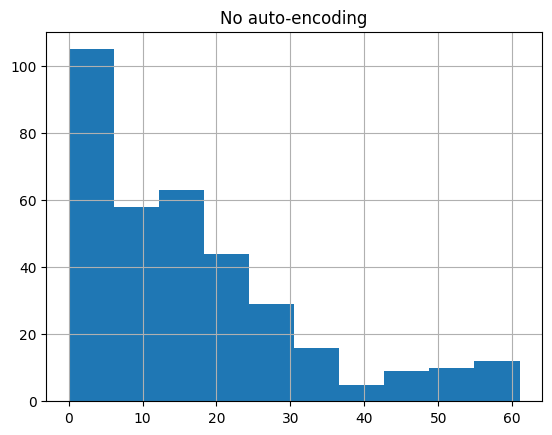

Adult :    



UndefinedVariableError: name 'Dataset' is not defined

In [14]:
sd_method = 'Depth-First Search'
print(sd_method, ":    \n\n")
sd_results_path = r'C:\Users\20193723\OneDrive - TU Eindhoven\Documents\Research Topics in Data Mining\Interpretable-Subgroup-Discovery\results_renamed'
dct_datasets = ['Ionosphere', 'Adult'] # to test <- Remove later
categorical_datasets = ['Mushroom', 'Adult']
quality_results = []
quality_results_columns = []
for dataset in dct_datasets:
    dataset_quality_results = []
    #Load dataframes and results
    df_file_name = dataset+'-data-reductions.pkl'
    results_file_name = dataset+'-results.pkl'
    with open(os.path.join(sd_results_path,df_file_name), 'rb') as f:
        dfs_dict =pickle.load(f)
    with open(os.path.join(sd_results_path,results_file_name), 'rb') as f:
        results_dict =pickle.load(f)
    if sd_method != 'Beam Search':
        print(dataset, ":    \n")
        en_methods = ['auto_encoder', 'PCA', 'SPCA']
        output_en, output = calc_result_ps(dfs_dict['auto_encoder'], dfs_dict['vanilla'], results_dict['auto_encoder'][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])
        dataset_quality_results.append(output)
        for en_method in en_methods:
            print(en_method)
            output_en, output = calc_result_ps(dfs_dict[en_method], dfs_dict['vanilla'], results_dict[en_method][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])
            dataset_quality_results.append(output_en)
    columns = ['Vanilla', 'Auto Encoder', 'PCA', 'SPCA']
    quality_results.append(dataset_quality_results)
    quality_results_columns.append(columns)
        
    
    


In [3]:
calc_result_ps(dfs_dict['auto_encoder'], dfs_dict['vanilla'], results_dict['auto_encoder'][sd_method]['results_org'], results_dict['vanilla'][sd_method]['results_org'])

NameError: name 'dfs_dict' is not defined